# Lesson 1: Why Federated Learning?

Welcome to Lesson 1!

To access the `requirements.txt` and `utils1.py` file for this course, go to `File` and click `Open`.

#### 1. Import utils

In [1]:
from utils1 import *

C:\Users\LENOVO X1E\.conda\envs\HUGGINGFACE\lib\site-packages\onnxscript\converter.py:823: FutureWarning: 'onnxscript.values.Op.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
C:\Users\LENOVO X1E\.conda\envs\HUGGINGFACE\lib\site-packages\onnxscript\converter.py:823: FutureWarning: 'onnxscript.values.OnnxFunction.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()


#### 2. Import the MNIST dataset

* Load the MNIST dataset using the `datasets.MNIST` function.

In [2]:
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:04<00:00, 2431351.32it/s]


Extracting ./MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 121302.00it/s]


Extracting ./MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1138680.37it/s]


Extracting ./MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2273061.54it/s]

Extracting ./MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST\raw



* Split the training dataset to three datasets for this example.

In [3]:
total_length = len(trainset)
split_size = total_length // 3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

* Set the three different datasets, excluding some digits as shown in the explanation.
    - `part1` excludes digits 1, 3, and 7.
    - `part2` excludes digits 2, 5, and 8.
    - `part3` excludes digits 4, 6, and 9.

This simulates the different datasets that might be available in real world (datasets with missing data, extra data, etc).

In [4]:
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

> Note: The function ```exclude_digits``` has been provided for your use. You can find it in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

* Plot the three datasets.

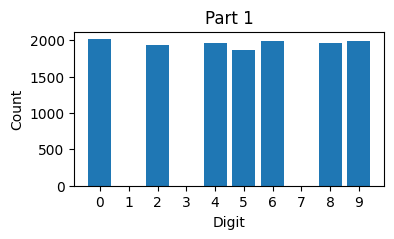

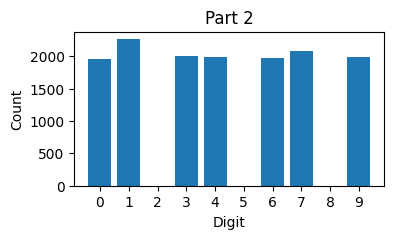

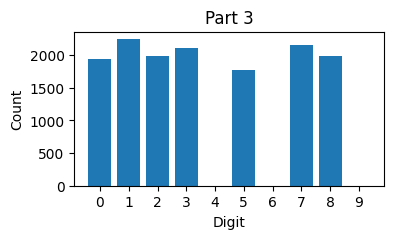

In [5]:
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

#### 3. Train and test the models

* Define three and run the models.

Three instances of the `SimpleModel` class (`model1`, `model2`, `model3`) are created for training.
Find the `SimpleModel` class in the `utils1.py` file.

In [6]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065381919228753
Epoch 2: Loss = 0.2450049386814583
Epoch 3: Loss = 0.19132230037520098
Epoch 4: Loss = 0.15809842999591384
Epoch 5: Loss = 0.1312836373268172
Epoch 6: Loss = 0.10978718732245439
Epoch 7: Loss = 0.09575812111413756
Epoch 8: Loss = 0.08386203635830519
Epoch 9: Loss = 0.07029048298420601
Epoch 10: Loss = 0.060494832330664924
Training complete
Epoch 1: Loss = 0.3983497679167028
Epoch 2: Loss = 0.18235595431178808
Epoch 3: Loss = 0.16427662250186717
Epoch 4: Loss = 0.1346918825625575
Epoch 5: Loss = 0.12097253416764683
Epoch 6: Loss = 0.09941595293847579
Epoch 7: Loss = 0.09128516018141195
Epoch 8: Loss = 0.0808932812547677
Epoch 9: Loss = 0.07205459455768246
Epoch 10: Loss = 0.06480233350469332
Training complete
Epoch 1: Loss = 0.5017057970703185
Epoch 2: Loss = 0.2653437458851316
Epoch 3: Loss = 0.20875811367085925
Epoch 4: Loss = 0.16561078213088148
Epoch 5: Loss = 0.14032496735117994
Epoch 6: Loss = 0.12107362372481877
Epoch 7: Loss = 0.100501824396888

#### 4. Evaluate the models

* Load the test dataset.

In [7]:
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

* Dataset preparation:
   - `testset_137` includes digits 1, 3, and 7.
   - `testset_258` includes digits 2, 5, and 8.
   - `testset_469` includes digits 4, 6, and 9.

In [8]:
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

> Note: The function ```include_digits``` has been provided for your use. You can find it in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

* Evaluate the models with the test datasets.

The `evaluate_model` function is called to evaluate each model defined above (`model1`, `model2`, `model3`) on both, the entire test dataset and specific subsets of the test dataset.

In [9]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6571, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6878, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6840, Test Accuracy on [4,6,9]: 0.0000


* Analyze the results looking at the 'confusion matrix' for the three models just trained using the ```compute_confusion_matrix```. You can find this function in the `utils1.py` file. 

  To access this file, go to `File` and click `Open`.

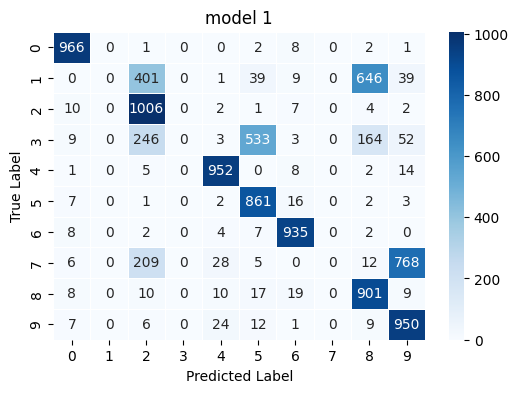

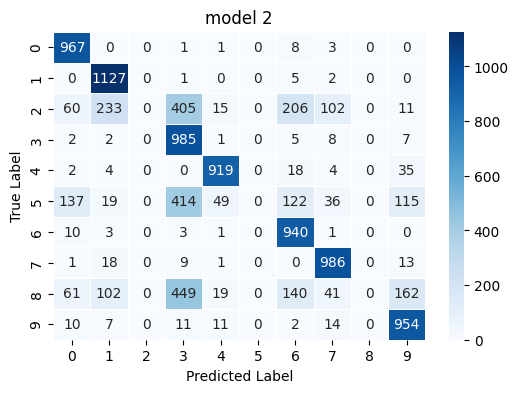

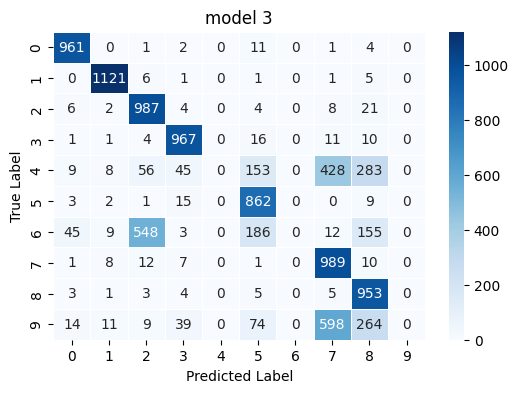

In [10]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")